<a href="https://colab.research.google.com/github/acg12/Scholarship-Bootcamp/blob/main/CASE_FINAL_PROJECT_ML/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd 

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(4088, 12)
(1022, 12)


# Preprocessing

During this stage I will cover a few issues found during the previous stage:

- "age" doesn't have a normal distribution
- "bmi" has null values and a log-normal distribution

## "age" doesn't have a normal distribution

In [26]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked,0
3927,56137,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown,0
2337,54590,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked,0
3910,36548,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0
1886,61171,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

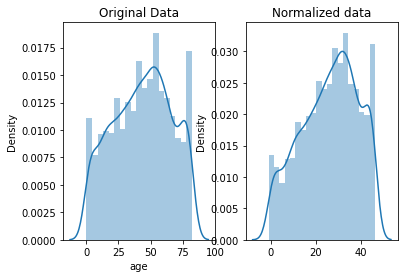

In [27]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

normalized_age = stats.boxcox(train['age'])
normalized_age_test = stats.boxcox(test['age'])

fig, ax=plt.subplots(1,2)
sns.distplot(train['age'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_age[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [28]:
normalized_age_series = pd.Series(normalized_age[0])
normalized_age_series_test = pd.Series(normalized_age_test[0])

normalized_age_series.index = train.index
normalized_age_series_test.index = test.index

normal_age_train = pd.concat([train.drop('age', axis=1), normalized_age_series], axis=1)
normal_age_test = pd.concat([test.drop('age', axis=1), normalized_age_series_test], axis=1)

normal_age_train.rename(columns={0: 'age'}, inplace=True)
normal_age_test.rename(columns={0: 'age'}, inplace=True)

normal_age_train

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age
802,4970,Male,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked,0,44.914019
3927,56137,Female,0,0,Yes,Private,Urban,88.32,36.3,Unknown,0,36.461240
2337,54590,Female,0,0,No,Private,Rural,59.52,33.7,never smoked,0,14.041502
3910,36548,Male,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0,19.903461
1886,61171,Female,0,0,No,Private,Rural,59.63,19.9,never smoked,0,19.903461
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,Male,0,0,Yes,Govt_job,Rural,88.00,30.6,never smoked,0,26.539332
466,1307,Female,1,0,Yes,Private,Rural,170.05,60.2,smokes,0,35.952970
3092,31481,Female,0,0,No,children,Urban,97.28,17.8,Unknown,0,0.158017
3772,61827,Male,0,0,Yes,Self-employed,Rural,196.08,31.0,formerly smoked,0,45.401297


## "bmi" has null values and a log-normal distribution

In [29]:
bmi_not_na = normal_age_train.copy()
bmi_not_na_test = normal_age_test.copy()

bmi_not_na['bmi'].fillna(bmi_not_na['bmi'].mean(), inplace=True)
bmi_not_na_test['bmi'].fillna(bmi_not_na_test['bmi'].mean(), inplace=True)

print(bmi_not_na.isna().sum())
print(bmi_not_na_test.isna().sum())

id                   0
gender               0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age                  0
dtype: int64
id                   0
gender               0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age                  0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


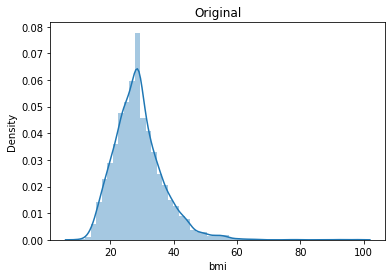

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


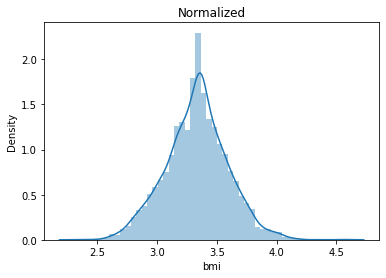

In [30]:
import numpy as np

normal_bmi_train = bmi_not_na.copy()
normal_bmi_test = bmi_not_na_test.copy()

normal_bmi_train['bmi'] = np.log(normal_bmi_train['bmi'])
normal_bmi_test['bmi'] = np.log(normal_bmi_test['bmi'])

sns.distplot(a=bmi_not_na['bmi'])
plt.title('Original')
plt.show()
sns.distplot(a=normal_bmi_train['bmi'])
plt.title('Normalized')
plt.show()

## "gender" has an "other" type

In [31]:
clean_gender_train = normal_bmi_train.copy()
clean_gender_test = normal_bmi_test.copy()

clean_gender_train = clean_gender_train[clean_gender_train['gender'] != 'Other']
clean_gender_test = clean_gender_test[clean_gender_test['gender'] != 'Other']

print(clean_gender_train['gender'].unique())
print(clean_gender_test['gender'].unique())

['Male' 'Female']
['Male' 'Female']


# Mutual Information

In [32]:
X = train.drop('stroke', axis=1)
y = train['stroke']

In [33]:
for colname in X.select_dtypes(['object', 'float64']):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
discrete_features

id                   True
gender               True
age                  True
hypertension         True
heart_disease        True
ever_married         True
work_type            True
Residence_type       True
avg_glucose_level    True
bmi                  True
smoking_status       True
dtype: bool

In [34]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

id                   0.185787
avg_glucose_level    0.167302
bmi                  0.046324
age                  0.042874
work_type            0.005867
heart_disease        0.005553
ever_married         0.005505
hypertension         0.005108
smoking_status       0.002180
Residence_type       0.000111
gender               0.000023
Name: MI Scores, dtype: float64

As we've suspected from our EDA, Residence_type and gender has a weak relationship with the column stroke. We will drop those columns.

In [35]:
clean_gender_train.drop(['gender', 'Residence_type'], axis=1, inplace=True)
clean_gender_test.drop(['gender', 'Residence_type'], axis=1, inplace=True)

print(clean_gender_train.columns)
print(clean_gender_test.columns)

Index(['id', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'age'],
      dtype='object')
Index(['id', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'age'],
      dtype='object')


# Final Export CSV

In [36]:
clean_gender_train.to_csv('train.csv')
clean_gender_test.to_csv('test.csv')